In [1]:
from specim.specfuncs import spec1d
import glob

In [2]:
infile = '../galaxy_spectra/LRIS_red_data_201213/keck_lris_red_D/Science/*'

In [7]:
flag = 1
for i,p in enumerate(glob.glob(infile)):
    if 'spec1d' in p and 'B0445' in p:
        if '.fits' in p:
            print(p)
            if flag :
                spec_coadd = spec1d.Spec1d(p, informat='pypeit', trimsec=[0, 4050])
                flag = 0 
                k = 0
            else:
                sp = spec1d.Spec1d(p, informat='pypeit', trimsec=[0, 4050])
                k = k+1
            if k:    
                spec_coadd = spec_coadd.__add__(sp)
        

../galaxy_spectra/LRIS_red_data_201213/keck_lris_red_D/Science/spec1d_r201213_0030-B0445+123_LRISr_2020Dec13T085600.413.fits

Reading spectrum from ../galaxy_spectra/LRIS_red_data_201213/keck_lris_red_D/Science/spec1d_r201213_0030-B0445+123_LRISr_2020Dec13T085600.413.fits
Expected file format: pypeit
 Spectrum Start:  5651.28
 Spectrum End:     8890.69
 Dispersion (1st pixel):   0.77
 Dispersion (average):      0.80

../galaxy_spectra/LRIS_red_data_201213/keck_lris_red_D/Science/spec1d_r201213_0032-B0445+123_LRISr_2020Dec13T102324.288.fits

Reading spectrum from ../galaxy_spectra/LRIS_red_data_201213/keck_lris_red_D/Science/spec1d_r201213_0032-B0445+123_LRISr_2020Dec13T102324.288.fits
Expected file format: pypeit
 Spectrum Start:  5651.47
 Spectrum End:     8890.88
 Dispersion (1st pixel):   0.77
 Dispersion (average):      0.80

 Spectrum Start:  5651.28
 Spectrum End:     8890.69
 Dispersion (1st pixel):   0.77
 Dispersion (average):      0.80

../galaxy_spectra/LRIS_red_data_201213/

<IPython.core.display.Javascript object>


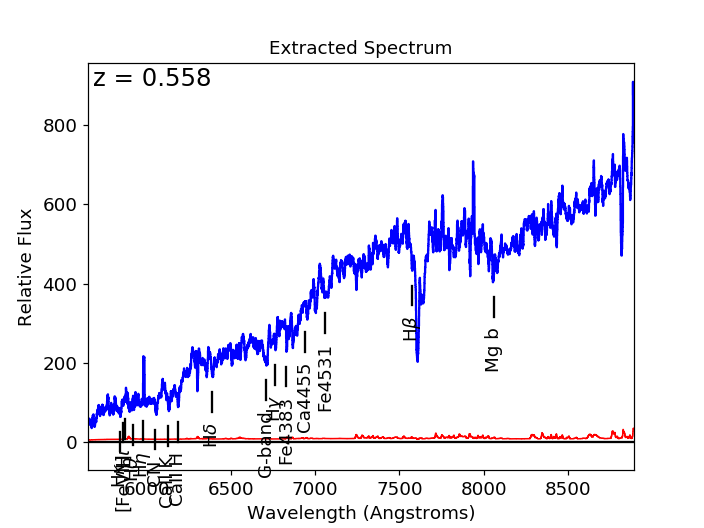


Line        lambda_rest  lambda_obs
----------  -----------  -----------
H-kappa       3750.00       5842.50
[Fe VII]      3761.40       5860.26
H-iota        3770.00       5873.66
H-theta       3797.00       5915.73
H-eta         3835.00       5974.93
CN bandhd     3883.00       6049.71
CaII K        3933.67       6128.66
CaII H        3968.47       6182.88
H-delta       4101.00       6389.36
G-band        4305.00       6707.19
H-gamma       4340.00       6761.72
Fe4383        4383.00       6828.71
Ca4455        4455.00       6940.89
Fe4531        4531.00       7059.30
H-beta        4861.00       7573.44
Mg I (b)      5176.00       8064.21



In [8]:
%matplotlib notebook
spec_coadd.smooth(11)
spec_coadd.mark_lines('abs', z=0.558, usesmooth=True)
#spec_coadd.mark_lines('strongem',z=0.558, usesmooth=True)

<IPython.core.display.Javascript object>


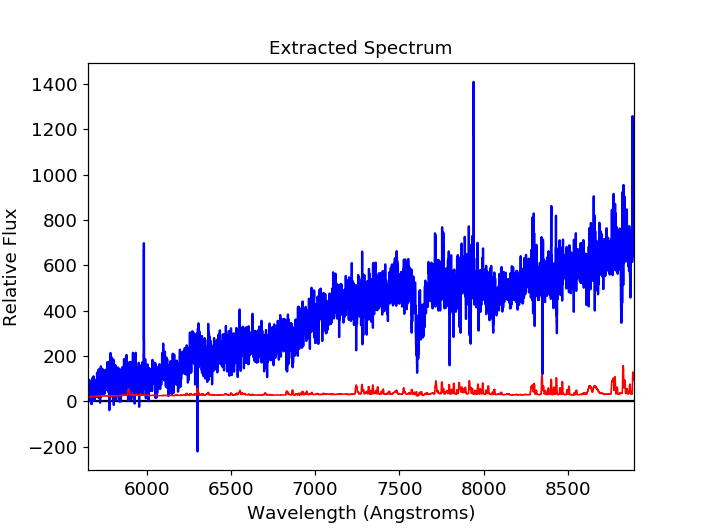

<IPython.core.display.Javascript object>


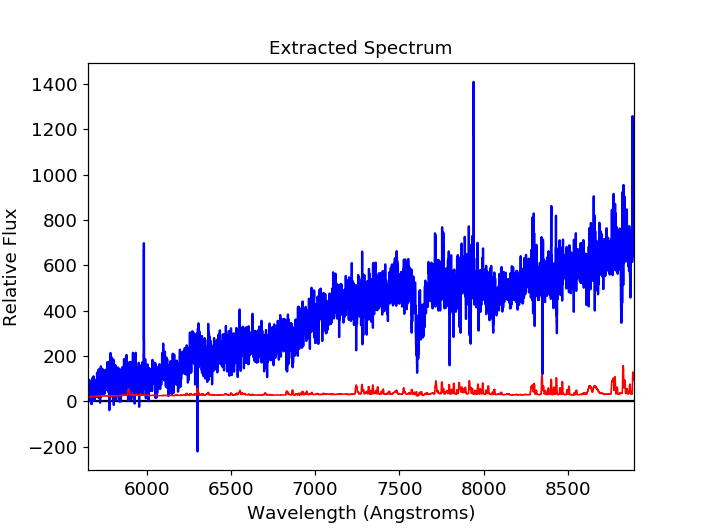

In [9]:
spec_coadd.plot()